<a href="https://colab.research.google.com/github/Stepan229/1234/blob/master/%D0%93%D1%80%D0%B0%D1%84%D0%B8%D0%BA%20%D1%81%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd     
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt



In [0]:
#Получение и чтение файла из облака
url = "https://drive.google.com/uc?export=download&id=1-4d2LnvzP-0y9j3v6zMzz5lytu6Gdm_o"
input_df = pd.read_csv(url, sep = '\t')
input_df.head()
    #https://drive.google.com/open?id=1-4d2LnvzP-0y9j3v6zMzz5lytu6Gdm_o
    #https://drive.google.com/open?id=1NxGvanTpGAW6j2CwzVCkywmcyU2A4vrQ

In [45]:
input_matrix = input_df.values # перевод таблицы в матрицу
print('размерность матрицы', input_matrix.shape)
print()


размерность матрицы (8760, 3)



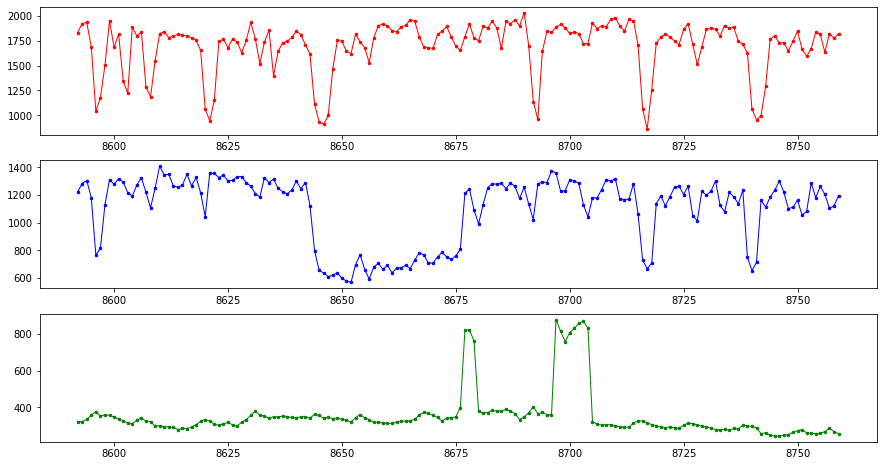

In [70]:
# вначале создать объект для рисования на нем
fig, ax = plt.subplots(3, 1, figsize = (15, 8))
timestamps = range(0, input_matrix.shape[0])
begin = 8592
end = 8760
step = 1
ax[0].plot(timestamps[begin : end : step], input_matrix[begin : end : step, 0], 'red',  marker = '.', linewidth = 1, markersize = 5)
ax[1].plot(timestamps[begin : end : step], input_matrix[begin : end : step, 1], 'blue', marker = '.', markersize = 5, linewidth = 1)
ax[2].plot(timestamps[begin : end : step], input_matrix[begin : end : step, 2], 'green', marker = '.', markersize = 5, linewidth = 1)
